In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/google_job_skills.csv",engine='python',encoding='utf-8')

In [72]:
df.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [5]:
df.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')

In [6]:
df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [7]:
df.shape

(1250, 7)

In [12]:
Title = df['Title'].dropna()

In [13]:
Title = Title.tolist() 

In [14]:
print(Title[0])

Google Cloud Program Manager


In [15]:
print(len(Title))

1250


In [16]:
def findJobCntonSkill(skill):
    requiredSkill = []
    for i in Title:
        if(skill in i):
            requiredSkill.append(i)
    return(len(requiredSkill))  

In [18]:
findJobCntonSkill("Data Analyst")

6

In [19]:
top5JobSkills = df['Title'].value_counts()
top5JobSkills[0:5]

Business Intern 2018                        35
MBA Intern, Summer 2018                     34
MBA Intern 2018                             28
BOLD Intern, Summer 2018                    21
Field Sales Representative, Google Cloud    17
Name: Title, dtype: int64

In [21]:
top10company = df['Company'].value_counts()# this data set is of google company job posting but had youtube jobs in it so took top 10 company for clarification
top10company[0:10]

Google     1227
YouTube      23
Name: Company, dtype: int64

In [22]:
top10job_Role = df['Title'].value_counts()
top10job_Role[0:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Partner Sales Engineer, Google Cloud           7
User Experience Design Intern, Summer 2018     7
Recruiter                                      7
Name: Title, dtype: int64

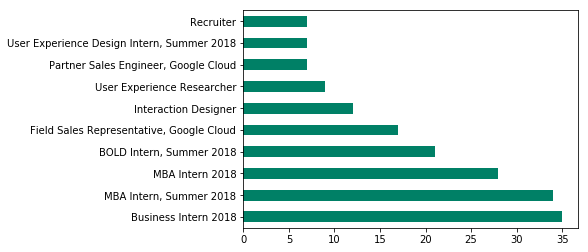

In [23]:
df['Title'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [25]:
top5Company = df['Company'].value_counts()
top5Company = top5Company[0:5]
print(type(top5Company))

<class 'pandas.core.series.Series'>


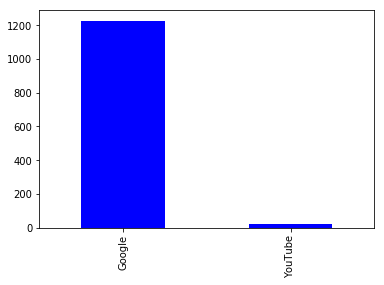

In [26]:
top5Company.plot.bar(stacked=True, colormap='winter')

In [27]:
top5ExperienceLevel = df['Minimum Qualifications'].value_counts()
top5ExperienceLevel[0:5]

Must be pursuing a full-time MBA program with an expected graduation date between December 2018 and June 2019.\nHave authorization to work in the United States.\nBe able to complete a 11-12 week program beginning in May or June 2018.                                                                                                                                                                32
Currently enrolled in a Bachelor's or Master's degree program and maintaining student status throughout the internship. Priority is given to students graduating end of 2018 or in 2019 so please include your graduation date on your resume.\nReturning to education on a full-time basis upon completing the internship.\nAbility to commit to a minimum of 10 weeks and up to 6 months at Google.    32
Be currently enrolled in a 4-year BA/BS program, in any major, at a university in the United States with an expected graduation date between December 2018 and June 2019.\nBe able to complete an 11-week progra

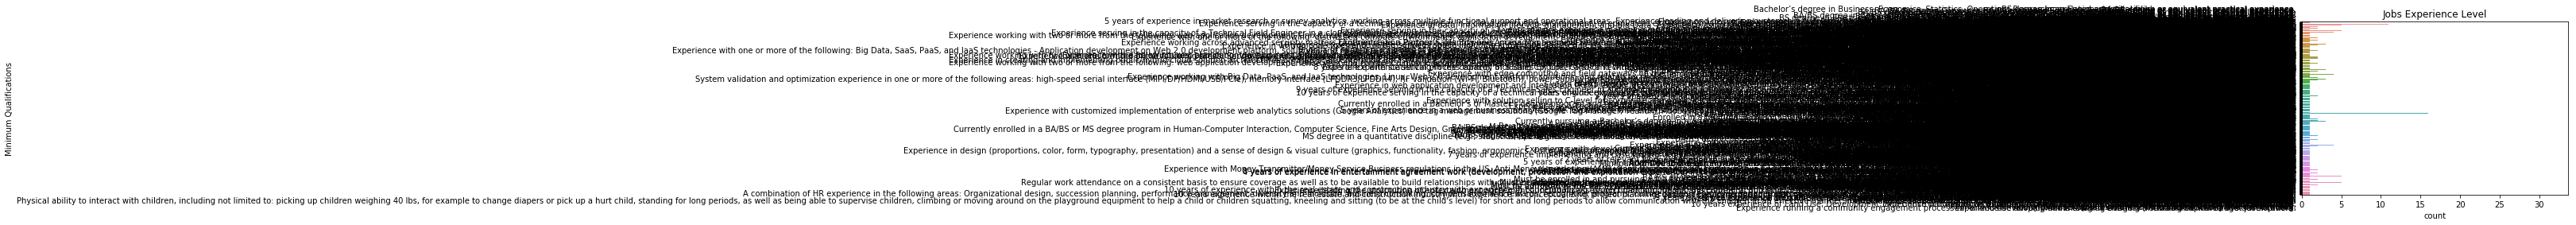

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="Minimum Qualifications", data=df)
plt.title("Jobs Experience Level")

plt.show()

In [29]:
diffJobCategories= df['Title'].dropna()

In [30]:
diffJobCategories.value_counts()

Business Intern 2018                                                            35
MBA Intern, Summer 2018                                                         34
MBA Intern 2018                                                                 28
BOLD Intern, Summer 2018                                                        21
Field Sales Representative, Google Cloud                                        17
Interaction Designer                                                            12
User Experience Researcher                                                       9
Partner Sales Engineer, Google Cloud                                             7
User Experience Design Intern, Summer 2018                                       7
Recruiter                                                                        7
Partner Onboarding Manager (Americas)                                            6
Deal Manager, Google Cloud                                                       6
User

In [31]:
dfJobLocation = df['Location'].value_counts()
dfJobLocation = dfJobLocation[0:10]

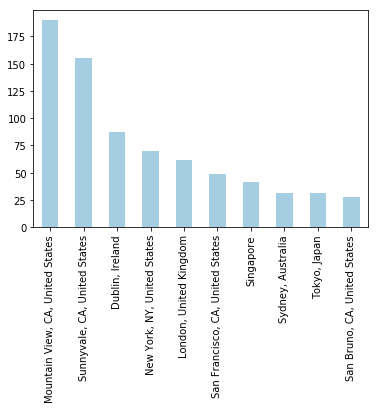

In [32]:
dfJobLocation.plot.bar(stacked=True, colormap='Paired')

In [36]:
# Different Job Categories in specified Location - London

df_skill_loc = df.loc[df['Location'] == 'City of Singapore, Singapore']
df_skill_loc['Category'].value_counts()

Series([], Name: Category, dtype: int64)

In [38]:
dfcomp = df_skill_loc['Company'].value_counts()
dfcomp[0:5]

Series([], Name: Company, dtype: int64)

In [39]:
jobRole = df['Title'].value_counts()
jobRole[0:5]

Business Intern 2018                        35
MBA Intern, Summer 2018                     34
MBA Intern 2018                             28
BOLD Intern, Summer 2018                    21
Field Sales Representative, Google Cloud    17
Name: Title, dtype: int64

In [40]:
df['Category'].value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 101
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   74
Partnerships                         60
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Software Engineering                 31
Hardware Engineering                 26
Real Estate & Workplace Services     25
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Technical Writing                     5
Developer Relations                   5
IT & Data Management                  5
Data Center & Network                 2
Name: Category, dtype: int64

In [41]:
diffJobCategories.value_counts()

Business Intern 2018                                                            35
MBA Intern, Summer 2018                                                         34
MBA Intern 2018                                                                 28
BOLD Intern, Summer 2018                                                        21
Field Sales Representative, Google Cloud                                        17
Interaction Designer                                                            12
User Experience Researcher                                                       9
Partner Sales Engineer, Google Cloud                                             7
User Experience Design Intern, Summer 2018                                       7
Recruiter                                                                        7
Partner Onboarding Manager (Americas)                                            6
Deal Manager, Google Cloud                                                       6
User

Analysis of Title data

In [42]:
JobSkills = df['Title'].dropna()

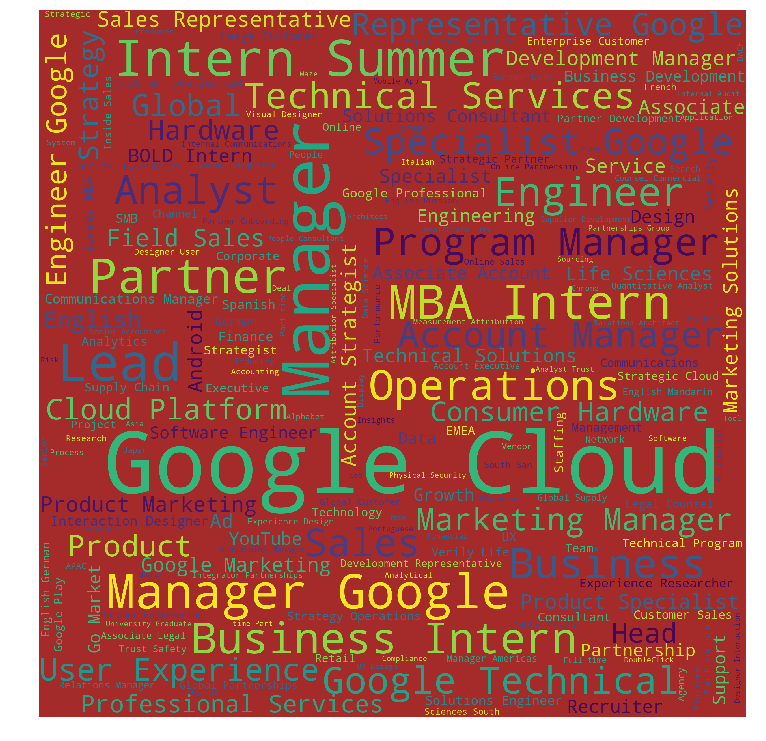

In [43]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Title)

In [45]:
Title = df['Title'].dropna()

In [46]:
#Title=Title.tolist() 

In [47]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [48]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Title))

print(data_words[:1])

[['google', 'cloud', 'program', 'manager']]


In [49]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['google', 'cloud', 'program', 'manager']


In [50]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [51]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['cloud', 'program', 'manager'], ['supplier', 'development', 'engineer', 'sde', 'cable', 'connector'], ['datum', 'analyst', 'product', 'tool', 'operation', 'service'], ['developer', 'advocate', 'partner', 'engineering']]


In [52]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [53]:
id2word[0]

'cloud'

In [54]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('cloud', 1), ('manager', 1), ('program', 1)],
 [('cable', 1),
  ('connector', 1),
  ('development', 1),
  ('engineer', 1),
  ('sde', 1),
  ('supplier', 1)],
 [('analyst', 1),
  ('datum', 1),
  ('operation', 1),
  ('product', 1),
  ('service', 1),
  ('tool', 1)]]

LDA for Title Data

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [56]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.159*"intern" + 0.148*"business" + 0.072*"security" + 0.047*"user" + '
  '0.042*"communication" + 0.040*"development" + 0.037*"designer" + '
  '0.035*"design" + 0.029*"event" + 0.021*"researcher"'),
 (1,
  '0.104*"recruiter" + 0.101*"counsel" + 0.064*"engineer" + 0.049*"platform" + '
  '0.038*"investigator" + 0.032*"accountant" + 0.025*"leadership" + '
  '0.023*"apac" + 0.020*"cloud" + 0.017*"tech"'),
 (2,
  '0.178*"manager" + 0.081*"summer" + 0.063*"service" + 0.053*"marketing" + '
  '0.047*"operation" + 0.034*"staffing" + 0.034*"strategy" + 0.028*"people" + '
  '0.026*"program" + 0.025*"hardware"'),
 (3,
  '0.113*"analyst" + 0.108*"specialist" + 0.050*"product" + 0.046*"lead" + '
  '0.043*"youtube" + 0.029*"research" + 0.026*"search" + 0.025*"datum" + '
  '0.024*"solution" + 0.022*"technology"'),
 (4,
  '0.128*"cloud" + 0.109*"manager" + 0.069*"partner" + 0.061*"sale" + '
  '0.053*"experience" + 0.032*"account" + 0.026*"estate" + 0.024*"customer" + '
  '0.022*"channel" + 0.0

In [57]:
# Compute Model Perplexity and Coherence Score

In [58]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.3037608021487275

Coherence Score:  0.6027906865268353


In [59]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.184817 -0.036440       1        1  29.966705
2     -0.196789 -0.181844       2        1  29.825809
0      0.295605 -0.193314       3        1  16.761436
3      0.000011  0.241550       4        1  14.301509
1      0.085989  0.170048       5        1   9.144536, topic_info=    Category        Freq            Term       Total  loglift  logprob
307  Default  122.000000          intern  122.000000  30.0000  30.0000
32   Default  114.000000        business  114.000000  29.0000  29.0000
0    Default  184.000000           cloud  184.000000  28.0000  28.0000
1    Default  403.000000         manager  403.000000  27.0000  27.0000
9    Default   74.000000         analyst   74.000000  26.0000  26.0000
45   Default   71.000000      specialist   71.000000  25.0000  25.0000
300  Default  111.000000          summer  111.000000  24.0000  24.0000
18   Default   94.000000         partner   94.000000  23.0000  23.0000
419  Default   44.000000       recruiter   44.000000  22.0000  22.0000
407  Default   42.000000         counsel   42.000000  21.0000  21.0000
13   Default   86.000000         service   86.000000  20.0000  20.0000
86   Default   55.000000        security   55.000000  19.0000  19.0000
36   Default   84.000000            sale   84.000000  18.0000  18.0000
23   Default   73.000000      experience   73.000000  17.0000  17.0000
160  Default   73.000000       marketing   73.000000  16.0000  16.0000
11   Default   64.000000       operation   64.000000  15.0000  15.0000
12   Default   58.000000         product   58.000000  14.0000  14.0000
6    Default   27.000000        engineer   27.000000  13.0000  13.0000
37   Default   59.000000            lead   59.000000  12.0000  12.0000
252  Default   36.000000            user   36.000000  11.0000  11.0000
115  Default   33.000000   communication   33.000000  10.0000  10.0000
155  Default   28.000000         youtube   28.000000   9.0000   9.0000
5    Default   31.000000     development   31.000000   8.0000   8.0000
420  Default   47.000000        staffing   47.000000   7.0000   7.0000
136  Default   46.000000        strategy   46.000000   6.0000   6.0000
42   Default   21.000000        platform   21.000000   5.0000   5.0000
321  Default   29.000000        designer   29.000000   4.0000   4.0000
21   Default   44.000000         account   44.000000   3.0000   3.0000
108  Default   27.000000          design   27.000000   2.0000   2.0000
422  Default   39.000000          people   39.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
448   Topic5   15.675124    investigator   16.518084   2.3396  -3.2814
375   Topic5   13.297839      accountant   14.131848   2.3312  -3.4459
425   Topic5   10.347158      leadership   11.206626   2.3122  -3.6968
262   Topic5    9.595444            apac   10.430162   2.3086  -3.7722
439   Topic5    5.309865       candidate    6.179313   2.2404  -4.3639
438   Topic5    5.309865      assessment    6.179313   2.2404  -4.3639
408   Topic5    5.007898         privacy    5.835791   2.2390  -4.4225
48    Topic5    4.903848        software    5.728322   2.2366  -4.4435
399   Topic5    4.958868       licensing    5.833525   2.2296  -4.4323
276   Topic5    4.702850        industry    5.533521   2.2294  -4.4853
395   Topic5    4.668247      controller    5.496678   2.2287  -4.4927
96    Topic5    4.340016             end    5.166226   2.2177  -4.5656
424   Topic5    4.254546            gbop    5.086993   2.2133  -4.5855
41    Topic5    4.152157       architect    4.977013   2.2108  -4.6099
236   Topic5    3.922875             smb    4.752634   2.2001  -4.6667
400   Topic5    3.810563       reporting    4.658538   2.1911  -4.6957
150   Topic5    3.421552         network    4.248901   2.1754  -4.8034
57    Topic5    3.209158  infrastructure    4.033878   2.1633  -4.8675
151   Topic5    3.233340     

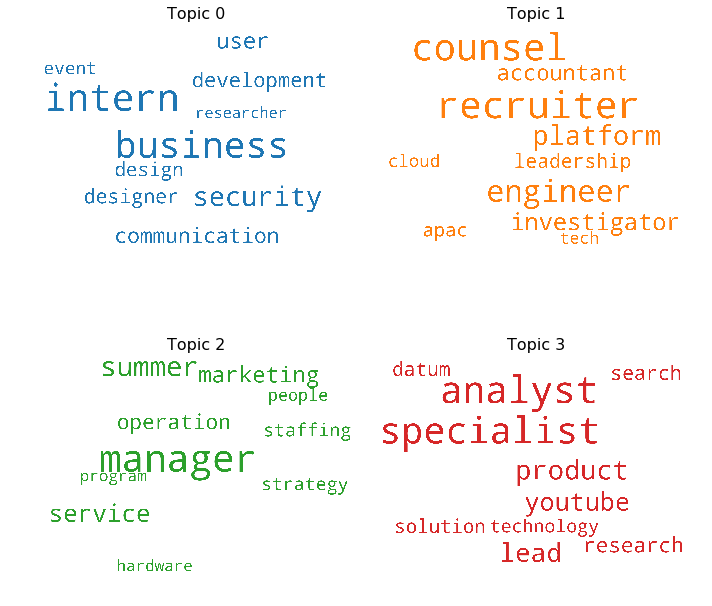

In [60]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Hyperparameter Tuning - Number of Topics and Alpha

In [61]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [62]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [63]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.522940
1,0.010,6,0.503739
2,0.010,10,0.509225
3,0.010,15,0.506027
4,0.010,20,0.502376
5,0.100,2,0.509419
6,0.100,6,0.501692
7,0.100,10,0.512499
8,0.100,15,0.505376
9,0.100,20,0.504794


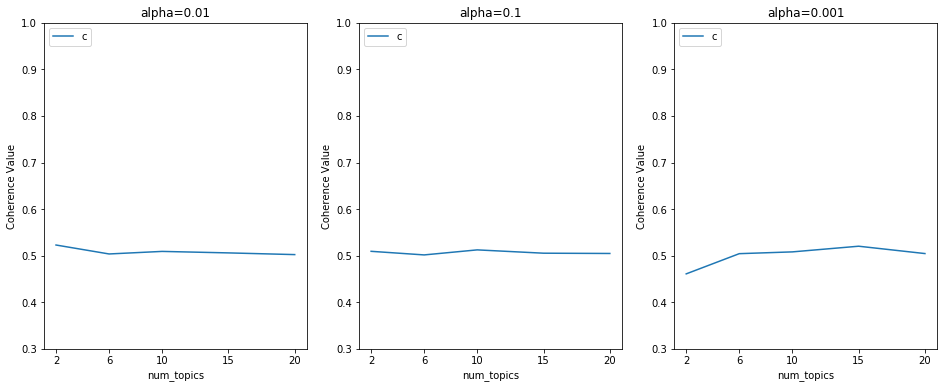

In [64]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [65]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [66]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.284*"intern" + 0.264*"business" + 0.219*"summer" + 0.083*"user" + '
  '0.020*"argentina" + 0.016*"brazil" + 0.012*"colombia" + 0.012*"mexico" + '
  '0.010*"display" + 0.006*"australia"'),
 (1,
  '0.313*"engineer" + 0.240*"platform" + 0.056*"software" + 0.039*"network" + '
  '0.013*"test" + 0.004*"robotic" + 0.004*"simulation" + 0.003*"integration" + '
  '0.001*"modeling" + 0.001*"waze"'),
 (2,
  '0.258*"hardware" + 0.148*"manager" + 0.127*"consumer" + 0.101*"mandarin" + '
  '0.057*"supply" + 0.052*"chain" + 0.015*"italian" + 0.014*"cantonese" + '
  '0.002*"cpus" + 0.001*"campus"'),
 (3,
  '0.425*"manager" + 0.087*"program" + 0.081*"communication" + 0.055*"event" + '
  '0.048*"partnership" + 0.029*"growth" + 0.026*"risk" + 0.022*"accounting" + '
  '0.020*"producer" + 0.020*"compliance"'),
 (4,
  '0.315*"cloud" + 0.249*"service" + 0.136*"staffing" + 0.134*"recruiter" + '
  '0.060*"finance" + 0.009*"deal" + 0.008*"japanese" + 0.003*"firebase" + '
  '0.000*"leadership" + 0.000*"c

In [67]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.761222577172121

Coherence Score:  0.5887313824259696


In [70]:
coherence_model_lda.get_coherence_per_topic()

[0.6374326687431497,
 0.5420538117643325,
 0.5463040409556994,
 0.607131029072276,
 0.6679797107164251,
 0.6217865218682098,
 0.6071824173397182,
 0.6006108115169236,
 0.639126768108832,
 0.6142334334896838,
 0.5376102255404823,
 0.5383980030803972,
 0.5270148606373255,
 0.5246882509015507,
 0.6194181826545384]

In [69]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.320955  0.042672       1        1  10.864326
11    -0.217585  0.018512       2        1   8.343497
0      0.076632 -0.051394       3        1   8.066220
4      0.145222  0.340822       4        1   8.055410
9     -0.300442  0.039417       5        1   7.886436
8      0.079405 -0.067279       6        1   7.682941
10     0.097709 -0.124402       7        1   7.344034
14     0.139467  0.268599       8        1   7.223225
5      0.097973 -0.123531       9        1   6.590145
2     -0.170958 -0.007436      10        1   5.359560
1      0.070516 -0.065263      11        1   5.137099
6      0.078437 -0.068656      12        1   4.641670
13     0.071692 -0.065737      13        1   4.419345
7      0.077455 -0.068547      14        1   4.406833
12     0.075431 -0.067777      15        1   3.979260, topic_info=    Category        Freq            Term       Total  loglift  logprob
1    Default  399.000000         manager  399.000000  30.0000  30.0000
0    Default  178.000000           cloud  178.000000  29.0000  29.0000
36   Default  107.000000            sale  107.000000  28.0000  28.0000
307  Default  105.000000          intern  105.000000  27.0000  27.0000
9    Default   83.000000         analyst   83.000000  26.0000  26.0000
160  Default  101.000000       marketing  101.000000  25.0000  25.0000
32   Default   98.000000        business   98.000000  24.0000  24.0000
13   Default   92.000000         service   92.000000  23.0000  23.0000
6    Default   74.000000        engineer   74.000000  22.0000  22.0000
108  Default   66.000000          design   66.000000  21.0000  21.0000
300  Default   81.000000          summer   81.000000  20.0000  20.0000
11   Default   76.000000       operation   76.000000  19.0000  19.0000
27   Default   64.000000        hardware   64.000000  18.0000  18.0000
12   Default   69.000000         product   69.000000  17.0000  17.0000
45   Default   79.000000      specialist   79.000000  16.0000  16.0000
18   Default   69.000000         partner   69.000000  15.0000  15.0000
42   Default   57.000000        platform   57.000000  14.0000  14.0000
33   Default   67.000000        solution   67.000000  13.0000  13.0000
23   Default   67.000000      experience   67.000000  12.0000  12.0000
5    Default   48.000000     development   48.000000  11.0000  11.0000
37   Default   58.000000            lead   58.000000  10.0000  10.0000
86   Default   61.000000        security   61.000000   9.0000   9.0000
136  Default   55.000000        strategy   55.000000   8.0000   8.0000
69   Default   41.000000         english   41.000000   7.0000   7.0000
420  Default   51.000000        staffing   51.000000   6.0000   6.0000
445  Default   38.000000          estate   38.000000   5.0000   5.0000
419  Default   50.000000       recruiter   50.000000   4.0000   4.0000
21   Default   41.000000         account   41.000000   3.0000   3.0000
227  Default   38.000000         channel   38.000000   2.0000   2.0000
26   Default   32.000000        consumer   32.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
445  Topic15   37.118534          estate   38.385700   3.1905  -1.5873
206  Topic15   18.641098            team   19.908262   3.1583  -2.2761
277  Topic15   16.012985       executive   17.280149   3.1479  -2.4280
230  Topic15    9.501207  representative   10.768371   3.0989  -2.9500
449  Topic15    7.472678        district    8.739841   3.0674  -3.1902
8    Topic15    4.679163        supplier    5.946327   2.9844  -3.6583
398  Topic15    0.455335       portfolio    1.741960   1.8823  -5.9882
130  Topic15    0.174385   administrator    1.442303   1.1113  -6.9479
399  Topic15    0.110205       licensing    1.386267   0.6920  -7.4069
415  Topic15    0.110248      production    1.398200   0.6839  -7.4065
447  Topic15    0.108907       workplace    1.385211   0.

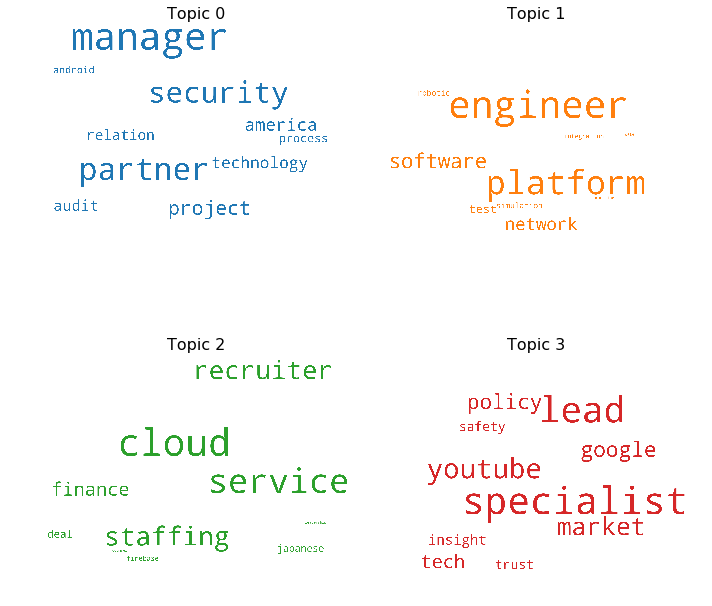

In [71]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()